### Set Up

In [1]:
# imports and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# dataframe
df = pd.read_csv('data/dataset_updated.csv', encoding='latin1')

### Distribution of Wages Among Players

In [3]:
# max and min earners
print("Max Earner: " + df.loc[df['Weekly Gross'].idxmax(), 'Name'] + " earns a gross weekly wage of €" + str(df['Weekly Gross'].max()) + " playing for " + df.loc[df['Weekly Gross'].idxmax(), 'Club'] + " in " + df.loc[df['Weekly Gross'].idxmax(), 'Season'])
print("Min Earner: " + df.loc[df['Weekly Gross'].idxmin(), 'Name'] + " earns a gross weekly wage of €" + str(df['Weekly Gross'].min()) + " playing for " + df.loc[df['Weekly Gross'].idxmin(), 'Club'] + " in " + df.loc[df['Weekly Gross'].idxmax(), 'Season'])

Max Earner: Cristiano Ronaldo earns a gross weekly wage of €929929 playing for Juventus in 19/20
Min Earner: Felix Afena-Gyan earns a gross weekly wage of €968 playing for Roma in 19/20


Text(0.5, 1.0, '[Max = €929,929, Min = €968]')

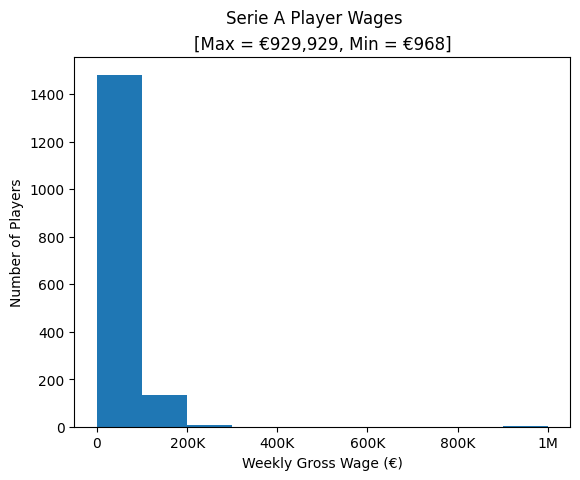

In [4]:
# histogram
plt.hist(df['Weekly Gross'], bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000])
plt.xlabel('Weekly Gross Wage (€)')
plt.ylabel('Number of Players')
plt.xticks(ticks=[0 ,200000, 400000, 600000, 800000, 1000000], labels = ['0', '200K', '400K', '600K', '800K', '1M'])
plt.suptitle('Serie A Player Wages')
plt.title('[Max = €929,929, Min = €968]')

In [5]:
# percentage of players earning less than 100k
total = len(df['Weekly Gross'])
low = 0

for i in df['Weekly Gross']:
    if i < 100000:
        low += 1

low

1481

**91% of Serie A players earn less than €100,000 per week. Let's look at this distribution closer...**

Text(0.5, 1.0, 'Serie A Player Wages < €100,000')

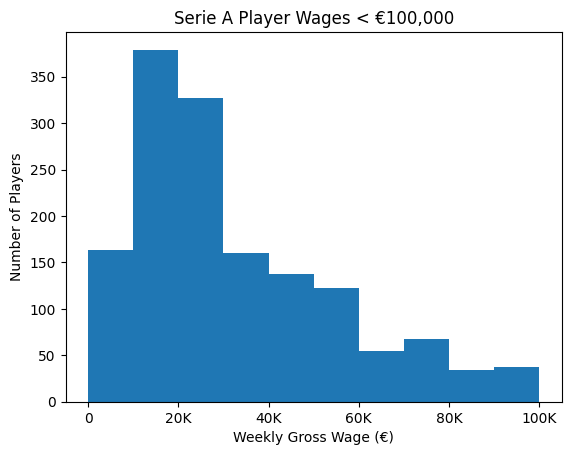

In [6]:
# histogram: weekly gross wage < 100,000
plt.hist(df['Weekly Gross'], bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])
plt.xlabel('Weekly Gross Wage (€)')
plt.ylabel('Number of Players')
plt.xticks(ticks=[0 ,20000, 40000, 60000, 80000, 100000], labels = ['0', '20K', '40K', '60K', '80K', '100K'])
plt.title('Serie A Player Wages < €100,000')

In [7]:
# percentage of players earning between 10K and 30K per week 
total = len(df['Weekly Gross'])
major = 0

for i in df['Weekly Gross']:
    if 10000 <= i <= 30000:
        major += 1

major/total

0.43419434194341944

**43.4 % of all players in the league earn between 10K and 30K gross per week - between 520,000 and 1,560,000 per year.**

### Distribution of Wages Among Clubs

In [8]:
# total and average spend on wages by clubs
total_club_spend = df.groupby('Club')['Weekly Gross'].sum()
total_club_spend = total_club_spend.sort_values(ascending=False)

average_club_spend = df.groupby('Club')['Weekly Gross'].mean()
average_club_spend = average_club_spend.sort_values(ascending=False)

In [25]:
total_club_spend

Club
Juventus         14944180
Inter Milan       9346357
Roma              7075746
Napoli            6487420
AC Milan          5512274
Lazio             4814252
Fiorentina        3116389
Torino            2893533
Atalanta          2493952
Cagliari          2143674
Bologna           2099877
Sampdoria         1903160
Sassuolo          1830572
Genoa             1664730
Udinese           1274423
Hellas Verona      900240
Parma              771706
SPAL               552518
Spezia             273125
Chievo Verona      248284
Empoli             245439
Salernitana        131421
Lecce               43572
Monza               41764
Crotone             12796
Name: Weekly Gross, dtype: int64

In [9]:
average_club_spend

Club
Juventus         143694.038462
Inter Milan       89012.923810
Roma              69370.058824
Napoli            65529.494949
AC Milan          53517.223301
Lazio             46740.310680
Monza             41764.000000
Fiorentina        32804.094737
Torino            31113.258065
Atalanta          27406.065934
Cagliari          25827.397590
Bologna           23075.571429
Genoa             21904.342105
Lecce             21786.000000
Parma             21436.277778
Sampdoria         21383.820225
Sassuolo          17601.653846
Empoli            16362.600000
Hellas Verona     16075.714286
Udinese           14993.211765
SPAL              14932.918919
Salernitana       14602.333333
Chievo Verona     13067.578947
Crotone           12796.000000
Spezia            10115.740741
Name: Weekly Gross, dtype: float64

In [10]:
average_club_spend[-1]

10115.74074074074

#### Bar Chart

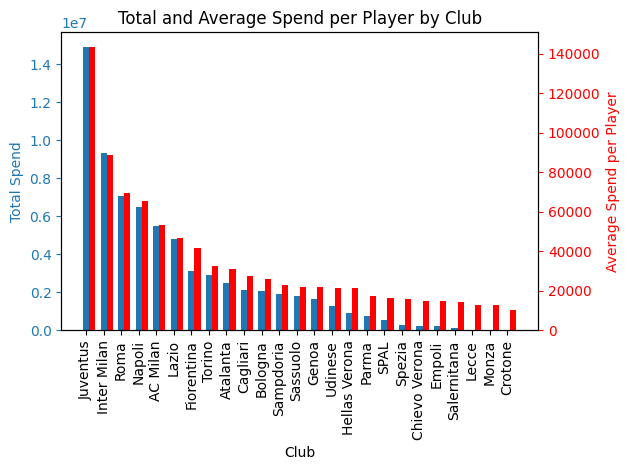

In [11]:
bar_width = 0.35

x = np.arange(len(total_club_spend))

fig, ax1 = plt.subplots()

ax1.bar(x, total_club_spend, bar_width, label='Total Spend', color='#1f77b4')

ax1.set_xlabel('Club')
ax1.set_ylabel('Total Spend')
ax1.set_title('Total and Average Spend per Player by Club')

ax1.set_xticks(x)
ax1.set_xticklabels(total_club_spend.index, rotation=90)
ax1.yaxis.label.set_color('#1f77b4')
ax1.tick_params(axis='y', colors='#1f77b4')  

ax2 = ax1.twinx()

ax2.bar(x + bar_width, average_club_spend, bar_width, color='red', label='Average Spend per Player')
ax2.set_ylabel('Average Spend per Player')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red') 

fig.tight_layout()

#### Pie Chart

In [12]:
total_club_names = total_club_spend.index.tolist()
average_club_names = average_club_spend.index.tolist()

In [13]:
total_labels = total_club_names
total_labels = [total_labels[0] + ' (max spender)'] + [''] * (len(total_labels) - 2) + [total_labels[-1] + ' (min spender)']

average_labels = average_club_names
average_labels = [average_labels[0] + ' (max spender)'] + [''] * (len(average_labels) - 2) + [average_labels[-1] + ' (min spender)']

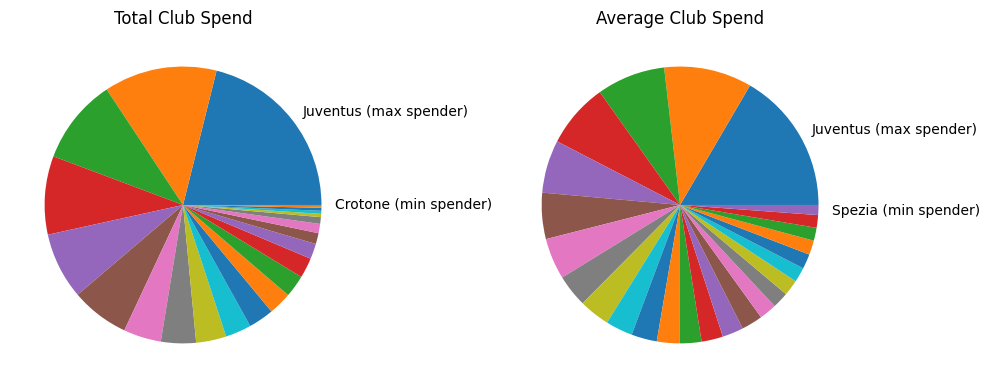

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

axes[0].pie(total_club_spend.values, labels=total_labels, rotatelabels=False)
axes[0].set_title("Total Club Spend")

axes[1].pie(average_club_spend.values, labels=average_labels, rotatelabels=False)
axes[1].set_title("Average Club Spend")

plt.tight_layout() 


There is definitely a difference in the amount spent by different clubs - worth including in a model.

In [15]:
max_club = total_club_spend.idxmax()
min_club = total_club_spend.idxmin()
max_spend = max(total_club_spend.values)
min_spend = min(total_club_spend.values)

#### Box Plots

In [16]:
df_filtered = df[df['Club'].isin([max_club, min_club])]

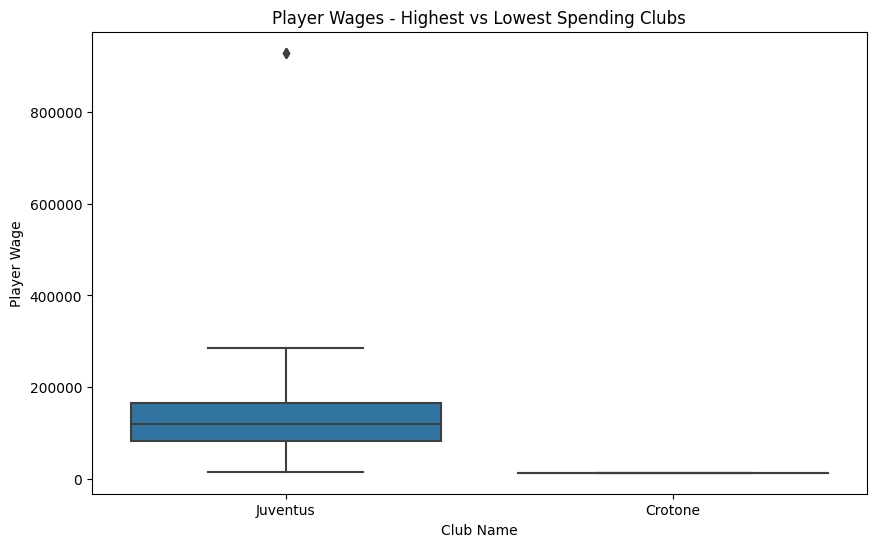

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Club', y='Weekly Gross', data=df_filtered, showfliers=True)
plt.title('Player Wages - Highest vs Lowest Spending Clubs')
plt.xlabel('Club Name')
plt.ylabel('Player Wage')
plt.show()

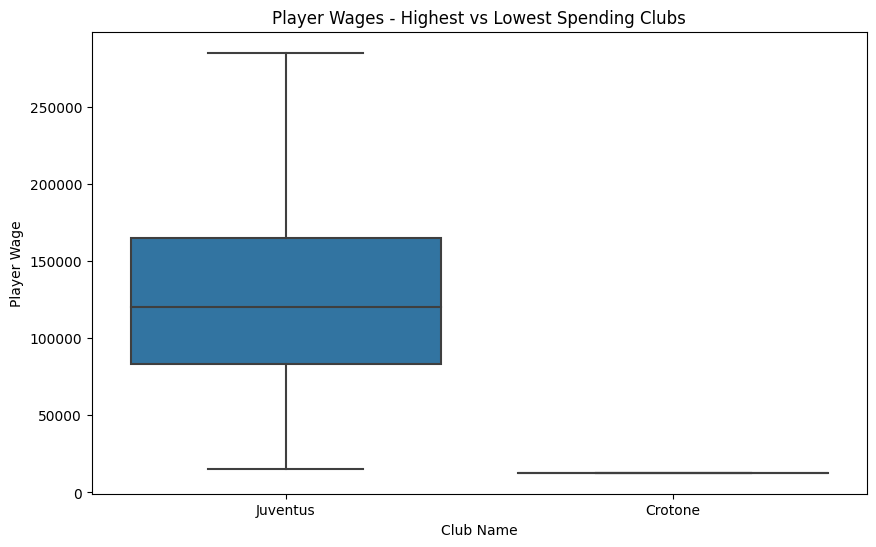

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Club', y='Weekly Gross', data=df_filtered, showfliers=False)
plt.title('Player Wages - Highest vs Lowest Spending Clubs')
plt.xlabel('Club Name')
plt.ylabel('Player Wage')
plt.show()

#### Statistical Testing

#### **Juventus:**
**Total Spend:** €14,944,180

**Average Spend per Player** 143,694.04

#### **Crotone:**
**Total Spend:** 12,796

**Average Spend per Player** 12,796

#### **Spezia:** 
**Total Spend:** 273,125

**Average Spend per Player** 10,115.74

In [19]:
df['Club'].dtype

dtype('O')

In [20]:
df['Club'] = df['Club'].astype("category")

In [21]:
x = df['Club']
y = df['Weekly Gross']

model = ols(formula='y ~ x', data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     42.18
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          3.10e-151
Time:                        06:46:07   Log-Likelihood:                -19645.
No. Observations:                1626   AIC:                         3.934e+04
Df Residuals:                    1601   BIC:                         3.947e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.352e+04   4243.352     12.612      0.000    4.52e+04    6.18e+04
x[T.Atalanta]      -2.611e+04   6195.684     -4.214      0.000   -3.83e+04    -1.4e+04
x[T.Bologna]       -3.044e+04   6195.684     -4.913      0.000   -4.26e+04   -1.83e+04
x[T.Cagliari]      -2.769e+04   6352.235     -4.359      0.000   -4.01e+04   -1.52e+04
x[T.Chievo Verona] -4.045e+04   1.08e+04     -3.762      0.000   -6.15e+04   -1.94e+04
x[T.Crotone]       -4.072e+04   4.33e+04     -0.941      0.347   -1.26e+05    4.42e+04
x[T.Empoli]        -3.715e+04   1.19e+04     -3.122      0.002   -6.05e+04   -1.38e+04
x[T.Fiorentina]    -2.071e+04   6126.041     -3.381      0.001   -3.27e+04   -8697.225
x[T.Genoa]         -3.161e+04   6512.216     -4.854      0.000   -4.44e+04   -1.88e+04
x[T.Hellas Verona] -3.744e+04   7150.125     -5.236      0.000   -5.15e+04   -2.34e+04
x[T.Inter Milan]     3.55e+04   5972.362      5.943      0.000    2.38e+04    4.72e+04
x[T.Juventus]       9.018e+04   5986.564     15.063      0.000    7.84e+04    1.02e+05
x[T.Lazio]         -6776.9126   6001.007     -1.129      0.259   -1.85e+04    4993.743
x[T.Lecce]         -3.173e+04   3.07e+04     -1.032      0.302    -9.2e+04    2.86e+04
x[T.Monza]         -1.175e+04   4.33e+04     -0.272      0.786   -9.66e+04    7.31e+04
x[T.Napoli]         1.201e+04   6061.320      1.982      0.048     123.315    2.39e+04
x[T.Parma]         -3.208e+04   8338.065     -3.848      0.000   -4.84e+04   -1.57e+04
x[T.Roma]           1.585e+04   6015.697      2.635      0.008    4053.366    2.77e+04
x[T.SPAL]          -3.858e+04   8254.148     -4.675      0.000   -5.48e+04   -2.24e+04
x[T.Salernitana]   -3.891e+04    1.5e+04     -2.600      0.009   -6.83e+04   -9553.717
x[T.Sampdoria]     -3.213e+04   6232.535     -5.156      0.000   -4.44e+04   -1.99e+04
x[T.Sassuolo]      -3.592e+04   5986.564     -5.999      0.000   -4.77e+04   -2.42e+04
x[T.Spezia]         -4.34e+04   9311.055     -4.661      0.000   -6.17e+04   -2.51e+04
x[T.Torino]         -2.24e+04   6160.212     -3.637      0.000   -3.45e+04   -1.03e+04
x[T.Udinese]       -3.852e+04   6310.715     -6.105      0.000   -5.09e+04   -2.61e+04
==============================================================================
Omnibus:                     2808.636   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3010518.880
Skew:                          11.508   Prob(JB):                         0.00
Kurtosis:                     212.538   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
anova_table = sm.stats.anova_lm(result, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
x,1.877635e+12,24.0,42.183674,3.100699e-151
Residual,2.969250e+12,1601.0,NaN,NaN


**p val << 0.05 - statistical difference very likely**

### Seasonal Trends

In [23]:
total_yearly_spend = df.groupby('Season')['Weekly Gross'].sum()
average_yearly_spend = df.groupby('Season')['Weekly Gross'].mean()

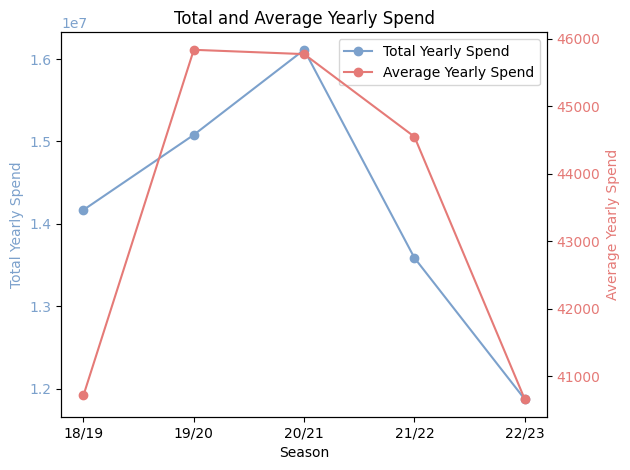

In [24]:
fig, ax1 = plt.subplots()

# Plotting the first line (Total Yearly Spend)
ax1.plot(total_yearly_spend.index, total_yearly_spend.values, marker='o', color='#7CA1CC', label='Total Yearly Spend')
ax1.set_xlabel('Season')
ax1.set_ylabel('Total Yearly Spend', color='#7CA1CC')
ax1.tick_params(axis='y', labelcolor='#7CA1CC')

# Creating a twin Axes object
ax2 = ax1.twinx()

# Plotting the second line (Average Yearly Spend)
ax2.plot(average_yearly_spend.index, average_yearly_spend.values, marker='o', color='#E57A77', label='Average Yearly Spend')
ax2.set_ylabel('Average Yearly Spend', color='#E57A77')
ax2.tick_params(axis='y', labelcolor='#E57A77')

# Adding a legend
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines])

plt.title('Total and Average Yearly Spend')

plt.tight_layout()